# Homework 8:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [1]:
## Set WD, read in .csv:
setwd("~/Documents/GitHub/Goldberg_DSPN_S22/hcp_data")
hcp_trimmed <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")

## Load tidyverse library; create new data frame specified above: 
library(tidyverse)
hcp_trimmed %>% 
  select(Subject, Gender, Flanker_Unadj, FS_IntraCranial_Vol, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>%
  drop_na() -> d1

head(d1)



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
1,100206,M,130.42,1864518,543134,807245
2,100307,F,112.56,1512540,407292,664124
3,100408,M,121.18,1684117,500417,726206
4,100610,M,126.53,1816044,512946,762308
5,101006,F,101.85,1437868,429449,579632
6,101107,M,107.04,1512727,416995,665024


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color). 

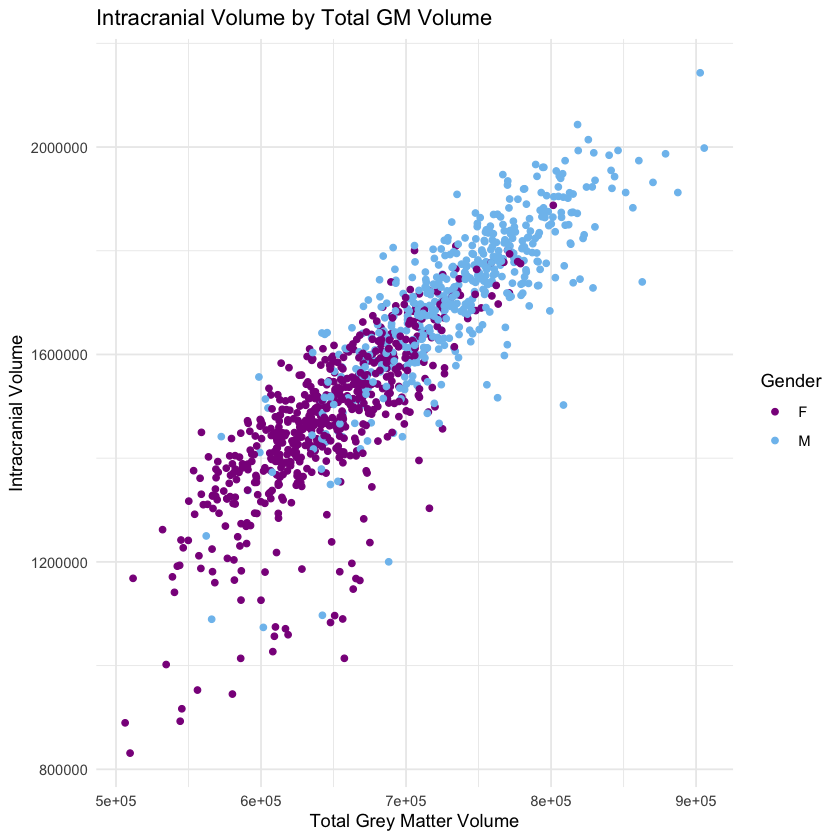

In [2]:
library(ggplot2)
ggplot(data = d1, aes(x = FS_Total_GM_Vol, y = FS_IntraCranial_Vol, color = Gender)) +
  geom_point() + scale_color_manual(values = c("magenta4", "skyblue2")) + labs(x = "Total Grey Matter Volume", 
                                                                               y = "Intracranial Volume", 
                                                                               title = "Intracranial Volume by Total GM Volume") +
  theme_minimal()

What patterns do you observe in the scatter plot?

> Gender aside, there appears to be a positive linear trend such that as total grey matter volume increases so does intracranial volume (this should make sense!). Examining the differences between sexes, it's visually appreciable that females generally tend to have smaller total grey matter volumes and intracranial volumes compared to men (NOT all the time, you can see data points for females in the regions on the graph predominated by men and vice versa). 

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume. 

In [3]:
d1$Gender <- as.factor(d1$Gender)
contrasts(d1$Gender)
## F = 0; M = 1
levels(d1$Gender) <- c(0,1)
contrasts(d1$Gender)

d1_glm_fit <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data = d1, family = binomial)
summary(d1_glm_fit)



## Call:
## glm(formula = Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, 
##     family = binomial, data = d1)

## Deviance Residuals: 
##     Min       1Q   Median       3Q      Max  
## -2.7695  -0.6173  -0.1863   0.5997   3.2309  

## Coefficients:
##                       Estimate Std. Error z value Pr(>|z|)    
## (Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
## FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
## FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
## FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
## ---
## Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## (Dispersion parameter for binomial family taken to be 1)

##     Null deviance: 1534.13  on 1112  degrees of freedom
## Residual deviance:  919.85  on 1109  degrees of freedom
## AIC: 927.85

## Number of Fisher Scoring iterations: 5



,M
F,0
M,1


,1
0,0
1,1



Call:
glm(formula = Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, 
    family = binomial, data = d1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7695  -0.6173  -0.1863   0.5997   3.2309  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

> Total grey matter volume and intracranial volume both are significantly associated with gender, whereas total white matter volume is not. 

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [4]:
# Estimate the prediction accuracy of your model (Note: this is the training set accuracy). 
glm.probs=predict(d1_glm_fit, d1, type="response")
glm.pred=rep(0,nrow(d1))
glm.pred[glm.probs>0.5]=1 #binarize the result
confusion_df = data.frame(glm.pred, d1$Gender) #create confusion df
colnames(confusion_df) = c('predicted', 'actual')
# Show the confusion matrix
table(confusion_df)

## For some reason on Github this matrix isn't appearing so copying here:

##             actual
## predicted   0   1
##         0 516 110
##         1  90 397

print(paste("Accuracy:", mean(confusion_df$predicted == confusion_df$actual)))
orig_accuracy <- mean(confusion_df$predicted == confusion_df$actual)
orig_accuracy


         actual
predicted   0   1
        0 516 110
        1  90 397

[1] "Accuracy: 0.820305480682839"


[1] 0.8203055

What is the prediction accuracy for gender from the full model?

> The prediction accuracy for gender from the full model is equal to 82.0%. 

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model. Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.


[1] 0.8180225


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = d1, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.8203055 -0.002283019 0.004607388


[1] 0.8177518

[1] 0.8182931

[1] 0.8180225

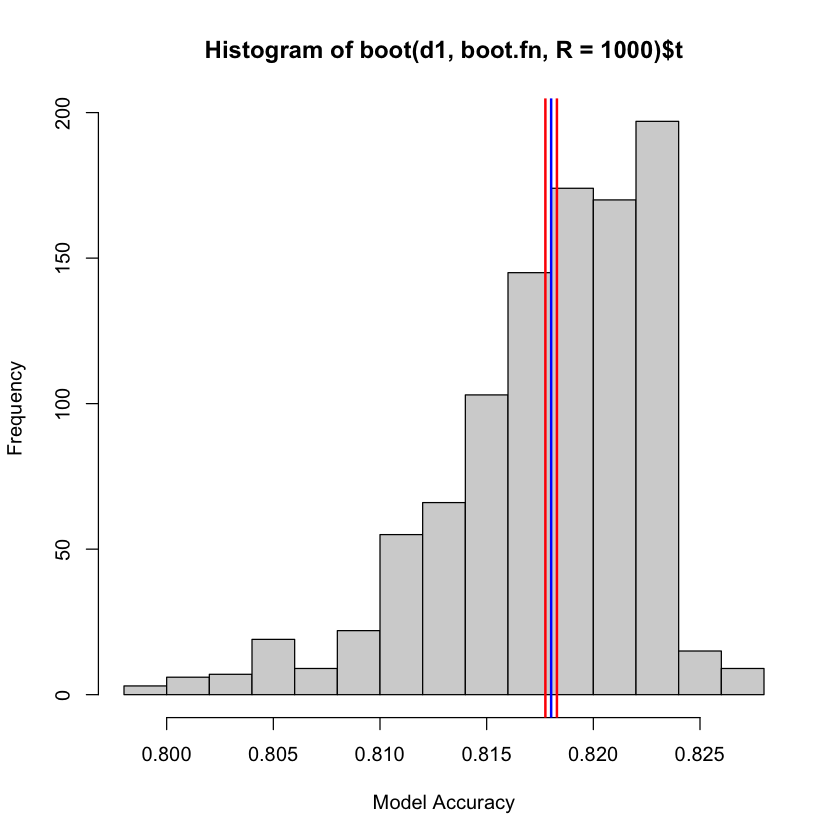

In [14]:
library(boot)
set.seed(8)

boot.fn <- function(data, index){
  ## Run logistic regression
  d1_glm_fit_boot <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data = d1, family = binomial,
                    subset = index)
  ## Use logistic regression model to generate probabilities
  glm.probs_boot=predict(d1_glm_fit_boot, d1, type="response")
  ## Create new object for prediction accuracies to be deposited
  glm.pred_boot=rep(0,nrow(d1))
  ## Classify men based on 0.5 threshold
  glm.pred_boot[glm.probs_boot>0.5]=1
  ## Create confusion data frame containing predicted and actual classification
  confusion_df_boot = data.frame(glm.pred_boot, d1$Gender) 
  ## Change column names
  colnames(confusion_df_boot) = c('predicted', 'actual')
  ## Return prediction accuracy
  return(mean(confusion_df_boot$predicted == confusion_df_boot$actual))
}

boot_obj = boot(d1, boot.fn, R = 1000)
# range(boot_obj$t)
mean(boot_obj$t)
print(boot_obj)

## Same issue - not showing up on Github so copying here:

## ORDINARY NONPARAMETRIC BOOTSTRAP


## Call:
## boot(data = d1, statistic = boot.fn, R = 1000)


## Bootstrap Statistics :
##      original       bias    std. error
## t1* 0.8203055 -0.002283019 0.004607388



## CI Calculation:
boot_mean <- mean(boot_obj$t)
boot_stdev <- sd(boot_obj$t)
n <- nrow(d1)
error <- qnorm(0.975)*boot_stdev/sqrt(n)
left <- boot_mean-error
right <- boot_mean+error
left
right
## CI: 0.81775 to 0.81829

boot_mean

## Falls within CI

hist(boot(d1 ,boot.fn ,R=1000)$t, xlab="Model Accuracy")
abline(v=c(left, right),col="red",lwd=2)
abline(v=boot_mean,col="blue",lwd=2)


How robust is the prediction accuracy of the full model?

> The prediction accuracy of the full model is robust - the original accuracy (82.0%) and the bagged accuracy (81.8%) are almost identical, which is one indicator. Of note, the confidence interval contains the bagged accuracy estimate (as expected), and does not include the value 0 which is what our null hypothesis would hope for (e.g. a null hypothesis is that model accuracy is equal to 0). 
> 

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

0.8059299
0.8068284
0.8050314
0.8059299
0.8032345
0.8068284


[1] 0.7960467 0.8158131

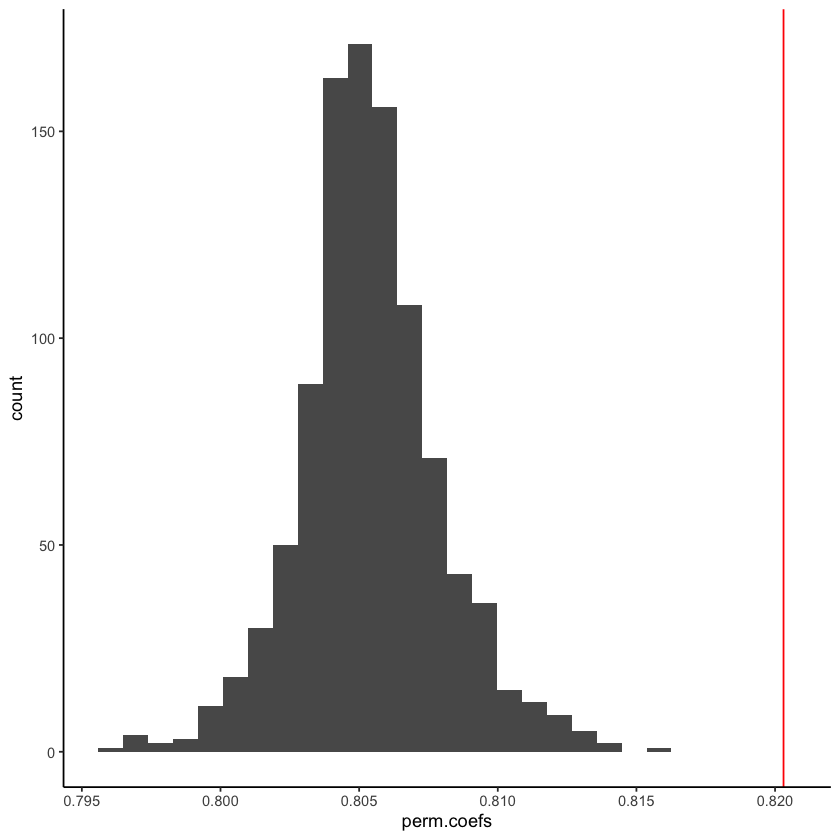

In [15]:
## First, make a copy of the data set that will be permuted multiple times: 
perm_d1 = d1
perm_d1_row <- nrow(perm_d1)
## Set number of iterations
R = 1000
## Make output object to store results
perm.coefs=matrix(NA,nrow=R, ncol=1)

for (i in 1:R){
  perm_d1$FS_Total_GM_Vol=d1$FS_Total_GM_Vol[sample(perm_d1_row)]
  d1_glm_fit_perm <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data = perm_d1, family = binomial)
  glm.probs_perm=predict(d1_glm_fit_perm, perm_d1, type="response")
  glm.pred_perm=rep(0,nrow(perm_d1))
  glm.pred_perm[glm.probs_perm>0.5]=1
  confusion_df_perm = data.frame(glm.pred_perm, perm_d1$Gender) 
  colnames(confusion_df_perm) = c('predicted', 'actual')
  perm.coefs[i] <- mean(confusion_df_perm$predicted == confusion_df_perm$actual)
}

## In hindsight thanks to Monique's feedback I realized I could use
## boot.fn() from above, because it calls the same lines of code; however,
## I already did this lol and so I'll just keep it as is. TYSM Monique, for your
## feedback!

head(perm.coefs)
range(perm.coefs)

ggplot() + geom_histogram(bins = 28, aes(x=perm.coefs)) + geom_vline(xintercept = orig_accuracy, color = "red") + 
  theme_classic()

How much does the grey matter volume influence the prediction accuracy of the model?

> Grey matter volume significantly influences the prediction accuracy of the model; the original prediction accuracy falls at an extreme upper bound point, suggesting that the true prediction accuracy comes from a distribution other than the null distribution. Essentially we are able to reject the null hypothesis that grey matter volume does not influence the prediction accuracy of the model given this plot. 

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

> Bootstrapping is resampling WITH replacement. This means that for bootstrapping, you take your original data frame and generate a "new" data frame where some rows are dropped and others are repeated. This provides you with a new distribution to draw from when executing your various statistics (for example, you can create new distributions of your sample mean for a given quantitative variable). Bootstrapping can be used for basic hypothesis testing, to establish more stable parameter estimation, and for bias correction. 

> Permutation testing is done WITHOUT replacement. This means that for permutation testing you will not remove or duplicate data points and instead redistribute the data. At its core, permutation testing is a form of hypothesis testing. You operate under the assumption that the null hypothesis is true. This can apply to MANY statistical inference problems! For example if you are comparing 2 groups on a given DV, you can permute group label such that people in group A may be assigned a Group B label. Then you examine the new distribution of estimate values and view if your original estimate falls along this permuted distribution. If it falls on the outermost extreme bounds, then you can reject the null hypothesis. This same process can be used with correlation (e.g. randomize X1, keep X2 constant), regression (e.g. hold X1 and X2 constant while permuting Y, X3, X4, ..., Xn), 

> Really, bootstrapping can be super helpful when resampling independent variables and permutation test is useful when interrogating your null hypothesis, which inherently deals with your dependent variable. 

**DUE:** 5pm EST, April 1, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> Monique Tardif, scientist by night manicurist by day.